# R: Explore Sales Data from Enterprise Systems through Machine Learning

## R implementation for association rules mining (arules package)

Initializing libraries

In [1]:
# Installing Brunel

try(system("pip install brunel --upgrade --user", intern = TRUE, ignore.stderr = TRUE))

# Installing supporting R packages
# Installing R packages for Brunel

#install.packages("devtools")

#devtools::install_github("Brunel-Visualization/Brunel", subdir="R", ref="master2.1", force=TRUE)

install.packages("devtools")
devtools::install_github("Brunel-Visualization/Brunel", subdir="R")

# Installing R packages for machine learning

install.packages("arules")

install.packages("C50")

# a package supporting model transformations for visualization

devtools::install_github("ibmdataworks/datafirst", subdir="datascientist/machinelearning/sigmoml", force=TRUE)

[1] "Requirement already up-to-date: brunel in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages"                                                                                                                    
 [2] "Requirement already up-to-date: jupyter-pip in /usr/local/src/bluemix_jupyter_bundle.v53/notebook/lib/python2.7/site-packages (from brunel)"                                                                                                                                    
 [3] "Requirement already up-to-date: pandas in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from brunel)"                                                                                                      
 [4] "Requirement already up-to-date: jinja2 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from brunel)"                                                                                                      
 [5] "Requirement already up-to-date: JPype1 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from brunel)"                                                                                                      
 [6] "Requirement already up-to-date: ipython in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from brunel)"                                                                                                     
 [7] "Requirement already up-to-date: pytz>=2011k in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from pandas->brunel)"                                                                                         
 [8] "Requirement already up-to-date: numpy>=1.7.0 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from pandas->brunel)"                                                                                        
 [9] "Requirement already up-to-date: python-dateutil in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from pandas->brunel)"                                                                                     
[10] "Requirement already up-to-date: MarkupSafe>=0.23 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from jinja2->brunel)"                                                                                    
[11] "Requirement already up-to-date: pygments in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from ipython->brunel)"                                                                                           
[12] "Requirement already up-to-date: setuptools>=18.5 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from ipython->brunel)"                                                                                   
[13] "Requirement already up-to-date: prompt-toolkit<2.0.0,>=1.0.4 in /gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/.local/lib/python2.7/site-packages (from ipython->brunel)"                                                                       
[14] "Requirement already up-to-date: backports.shutil-get-terminal-size; python_version == \"2.7\" in /usr/local/src/bluemix_jupyter_bundle.v53/notebook/lib/python2.7/site-packages (from ipython->brunel)"                                                                         
[15] "Requirement already up-to-date: pickleshare in /gpfs/global_fs01/sym_shared/YPProdSpark/u

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/R/libs’
(as ‘lib’ is unspecified)
Skipping install of 'brunel' from a github remote, the SHA1 (cd327ce4) has not changed since last install.
  Use `force = TRUE` to force installation
Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/R/libs’
(as ‘lib’ is unspecified)
Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/R/libs’
(as ‘lib’ is unspecified)
from URL https://api.github.com/repos/ibmdataworks/datafirst/zipball/master
Installing sigmoml
'/usr/local/src/bluemix_jupyter_bundle/R/lib64/R/bin/R' --no-site-file  \
  --no-environ --no-save --no-restore --quiet CMD INSTALL  \
  '/gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/notebook/tmp/RtmpUvgMc4/devtools9d1f1042e592/ibmdataworks-datafirst-f7d9ead/datascientist/machinelearning/sigmoml'  \
  --li

In [2]:
library(arules)
library(plyr)
library(ibmdbR)

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:SparkR’:

    decode, encode, size

The following objects are masked from ‘package:base’:

    abbreviate, write


Attaching package: ‘plyr’

The following objects are masked from ‘package:SparkR’:

    arrange, count, desc, join, mutate, rename, summarize, take

Loading required package: RODBC


In [3]:
install.packages("devtools")

Installing package into ‘/gpfs/global_fs01/sym_shared/YPProdSpark/user/sce6-e6b1c3357c3b2f-e6c62d2acbd3/R/libs’
(as ‘lib’ is unspecified)


Data wrangling with R: putting all the purchased items into a single transaction

# Insert a new cell with your dashDB connection here

In [4]:
# The code was removed by DSX for sharing.

PRODUCT_LINE      PRODUCT_TYPE  CUST_ORDER_NUMBER CITY    STATE COUNTRY
1 Camping Equipment Tents         109288            Tours   NA    France 
2 Camping Equipment Packs         109288            Tours   NA    France 
3 Camping Equipment Tents         109288            Tours   NA    France 
4 Camping Equipment Tents         190399            Brescia BS    Italy  
5 Camping Equipment Cooking Gear  109296            Brescia BS    Italy  
6 Camping Equipment Sleeping Bags 190399            Brescia BS    Italy  
  GENDER AGE MARITAL_STATUS PROFESSION
1 F      35  Married        Executive 
2 F      35  Married        Executive 
3 F      35  Married        Executive 
4 M      33  Married        Other     
5 M      33  Married        Other     
6 M      33  Married        Other

In [5]:
# using subset of fields: the values in the result set are unique
ordersDF <- ddply(data.df.2,c('CUST_ORDER_NUMBER','PRODUCT_LINE'),summarize, unused=sum(1))
ordersDF <- subset(ordersDF , select = c('CUST_ORDER_NUMBER','PRODUCT_LINE'))
# merging multiple lines related to the same order inta a single line
ordersDF <- aggregate( PRODUCT_LINE ~ CUST_ORDER_NUMBER, data = ordersDF, paste, collapse = ",")
# getting an list of items istead of a comma separated strings
ordersDF <- dlply(ordersDF, 1, function(items) (strsplit(items$PRODUCT_LINE, split=",")))

transactions <- unlist(ordersDF, recursive = FALSE, use.names = FALSE)
# filtering the transaction with multiple purchased items
transactions <- transactions [lapply(transactions , length) > 1]
print('Sample of transactions ready for Apriori algorithm')
head(transactions)


[1] "Sample of transactions ready for Apriori algorithm"


[[1]]
[1] "Golf Equipment"           "Mountaineering Equipment"

[[2]]
[1] "Camping Equipment"    "Personal Accessories"

[[3]]
[1] "Camping Equipment"  "Outdoor Protection"

[[4]]
[1] "Outdoor Protection"   "Personal Accessories"

[[5]]
[1] "Camping Equipment" "Golf Equipment"   

[[6]]
[1] "Camping Equipment"    "Personal Accessories"

Transforming data according to arules requirements and applying Apriori algorithm

In [6]:
transactions <- as(transactions, "transactions")

In [7]:
library(arules)

rulesMod <- apriori(transactions, parameter=list(support=0.05, conf=0.2, minlen=2))
rulesMod <- sort(rulesMod, decreasing=T, by="lift")

inspect(rulesMod)

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.2    0.1    1 none FALSE            TRUE       5    0.05      2
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 322 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[5 item(s), 6443 transaction(s)] done [0.00s].
sorting and recoding items ... [5 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [12 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
     lhs                           rhs                        support   
[1]  {Golf Equipment}           => {Personal Accessories}     0.09514201
[2]  {Outdoor Protection}       => {Camping Equipment}        0.20037250
[3]  {Camping Equipment}        => {Outdoor Protection}       0.200372

## Visualizing association rules

Brunel-based visualization

In [8]:
#Transforming the rules into a data frame
rulesSet <- as(rulesMod, "data.frame") 

rulesSet$rules <- gsub("\\{|\\}", "", rulesSet$rules)
rulesSet <- transform(rulesSet, col=do.call(rbind, strsplit(as.character(rules), '=>', fixed=TRUE)), stringsAsFactors=FALSE)

rulesSet <- rename(rulesSet, c("col.1"="LHS", "col.2"="RHS"))

In [9]:
library(brunel)

brunel (" data('rulesSet') chord x(LHS) y(RHS) color(confidence) size(support) tooltip(rules, support, confidence, lift)",
        width=600, height=400, online_js=TRUE)

<!-- ~ Copyright (c) 2015 IBM Corporation and others. ~ ~ Licensed under the Apache License, Version 2.0 (the "License"); ~ You may not use this file except in compliance with the License. ~ You may obtain a copy of the License at ~ ~ http://www.apache.org/licenses/LICENSE-2.0 ~ ~ Unless required by applicable law or agreed to in writing, software ~ distributed under the License is distributed on an "AS IS" BASIS, ~ WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. ~ See the License for the specific language governing permissions and ~ limitations under the License. -->

## Decision tree-based classification with SparkR and C5.0 library

Transforming the data for using in C5.0

In [10]:
# Preparing the data for training and classification
# Transforming the data frame into matrix
orderDetails <- data.df.2
orderDetails$COUNTRY = as.factor(orderDetails$COUNTRY)
orderDetails$GENDER = as.factor(orderDetails$GENDER)
orderDetails$MARITAL_STATUS = as.factor(orderDetails$MARITAL_STATUS)
orderDetails$PROFESSION = as.factor(orderDetails$PROFESSION)
orderDetails$PRODUCT_LINE = as.factor(orderDetails$PRODUCT_LINE)

set.seed(1234)
# training data set
trainingData <- orderDetails


Training the classification model: building model using C50 library

In [11]:
library(C50)
classifierModel <- C5.0(PRODUCT_LINE ~ AGE + GENDER + PROFESSION + MARITAL_STATUS , data=orderDetails, rules=FALSE)

#Detailed textual presentation:
#summary(classifierModel)

### Visualizing the model

Transforming the model for visualization:

In [12]:
library(sigmoml)
library(partykit)
library(plyr)

rulesDataFrame <- sigmoml::getRules(classifierModel)

Loading required package: grid

Attaching package: ‘grid’

The following object is masked from ‘package:SparkR’:

    explode



Graph representation

In [13]:
library(brunel)

brunel (" data('rulesDataFrame') treemap x(Level1, Level2, Level3, Level4, Level5, Level6, Level7, Level8, Level9) color(Prediction) size(Samples) label(Name) filter(Prediction) tooltip(#all)",
        width=1000, height=500, online_js=TRUE)

<!-- ~ Copyright (c) 2015 IBM Corporation and others. ~ ~ Licensed under the Apache License, Version 2.0 (the "License"); ~ You may not use this file except in compliance with the License. ~ You may obtain a copy of the License at ~ ~ http://www.apache.org/licenses/LICENSE-2.0 ~ ~ Unless required by applicable law or agreed to in writing, software ~ distributed under the License is distributed on an "AS IS" BASIS, ~ WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. ~ See the License for the specific language governing permissions and ~ limitations under the License. -->

In [14]:
library(brunel)
brunel (" data('rulesDataFrame') tree(prune:20) y(Level1, Level2, Level3, Level4, Level5, Level6, Level7, Level8, Level9) color(Prediction) label(Prediction) size(samples) tooltip(#all) legends(none)",
        width=1000, height=800, online_js=TRUE)

<!-- ~ Copyright (c) 2015 IBM Corporation and others. ~ ~ Licensed under the Apache License, Version 2.0 (the "License"); ~ You may not use this file except in compliance with the License. ~ You may obtain a copy of the License at ~ ~ http://www.apache.org/licenses/LICENSE-2.0 ~ ~ Unless required by applicable law or agreed to in writing, software ~ distributed under the License is distributed on an "AS IS" BASIS, ~ WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. ~ See the License for the specific language governing permissions and ~ limitations under the License. -->

Native R visualization

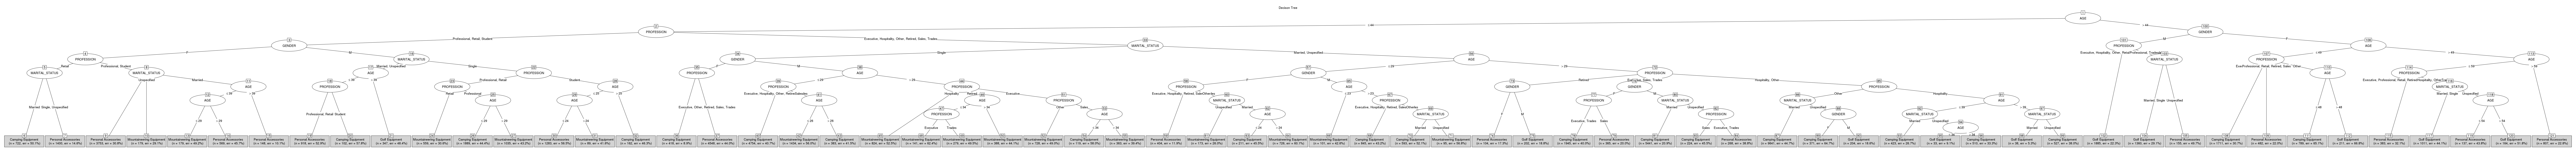

In [15]:
library(repr)

# Change plot size to 136 x 8
options(repr.plot.width=136, repr.plot.height=8)

plot(classifierModel, type="simple",main="Decison Tree", drop_terminal = TRUE)